# Analysis on COMPAS Recidivism Data
### By: Tyler Rosselli, Kyle Mettler, Ethan Wong

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
sns.set(rc={'figure.figsize':(30,50)})

In [223]:
df = pd.read_csv("compas-scores-raw.csv")

In [224]:
df.head()

Person_ID  AssessmentID  Case_ID Agency_Text LastName FirstName MiddleName  \
0      50844         57167    51950    PRETRIAL   Fisher     Kevin        NaN   
1      50844         57167    51950    PRETRIAL   Fisher     Kevin        NaN   
2      50844         57167    51950    PRETRIAL   Fisher     Kevin        NaN   
3      50848         57174    51956    PRETRIAL  KENDALL     KEVIN        NaN   
4      50848         57174    51956    PRETRIAL  KENDALL     KEVIN        NaN   

  Sex_Code_Text Ethnic_Code_Text DateOfBirth  ScaleSet_ID            ScaleSet  \
0          Male        Caucasian    12/05/92           22  Risk and Prescreen   
1          Male        Caucasian    12/05/92           22  Risk and Prescreen   
2          Male        Caucasian    12/05/92           22  Risk and Prescreen   
3          Male        Caucasian    09/16/84           22  Risk and Prescreen   
4          Male        Caucasian    09/16/84           22  Risk and Prescreen   

  AssessmentReason Language LegalStatus CustodyStatus MaritalStatus  \
0           Intake  English    Pretrial   Jail Inmate        Single   
1           Intake  English    Pretrial   Jail Inmate        Single   
2           Intake  English    Pretrial   Jail Inmate        Single   
3           Intake  English    Pretrial   Jail Inmate       Married   
4           Intake  English    Pretrial   Jail Inmate       Married   

  Screening_Date  RecSupervisionLevel RecSupervisionLevelText  Scale_ID  \
0    1/1/13 0:00                    1                     Low         7   
1    1/1/13 0:00                    1                     Low         8   
2    1/1/13 0:00                    1                     Low        18   
3    1/1/13 0:00                    1                     Low         7   
4    1/1/13 0:00                    1                     Low         8   

                 DisplayText  RawScore  DecileScore ScoreText AssessmentType  \
0           Risk of Violence     -2.08            4       Low            New   
1         Risk of Recidivism     -1.06            2       Low            New   
2  Risk of Failure to Appear     15.00            1       Low            New   
3           Risk of Violence     -2.84            2       Low            New   
4         Risk of Recidivism     -1.50            1       Low            New   

   IsCompleted  IsDeleted  
0            1          0  
1            1          0  
2            1          0  
3            1          0  
4            1          0

## Pandas Profiling

In [225]:
import pandas_profiling

In [226]:
pandas_profiling.ProfileReport(df)

C:\Users\kwong\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


## There are no duplicates

In [227]:
df.shape

(60843, 28)

In [228]:
df = df.drop_duplicates(keep='first')

In [229]:
df.shape

(60843, 28)

## Correct Types

In [230]:
df.dtypes

Person_ID                    int64
AssessmentID                 int64
Case_ID                      int64
Agency_Text                 object
LastName                    object
FirstName                   object
MiddleName                  object
Sex_Code_Text               object
Ethnic_Code_Text            object
DateOfBirth                 object
ScaleSet_ID                  int64
ScaleSet                    object
AssessmentReason            object
Language                    object
LegalStatus                 object
CustodyStatus               object
MaritalStatus               object
Screening_Date              object
RecSupervisionLevel          int64
RecSupervisionLevelText     object
Scale_ID                     int64
DisplayText                 object
RawScore                   float64
DecileScore                  int64
ScoreText                   object
AssessmentType              object
IsCompleted                  int64
IsDeleted                    int64
dtype: object

In [231]:
df.DateOfBirth = pd.to_datetime(df['DateOfBirth'])
df.Screening_Date = pd.to_datetime(df['Screening_Date'])

In [232]:
df.dtypes

Person_ID                           int64
AssessmentID                        int64
Case_ID                             int64
Agency_Text                        object
LastName                           object
FirstName                          object
MiddleName                         object
Sex_Code_Text                      object
Ethnic_Code_Text                   object
DateOfBirth                datetime64[ns]
ScaleSet_ID                         int64
ScaleSet                           object
AssessmentReason                   object
Language                           object
LegalStatus                        object
CustodyStatus                      object
MaritalStatus                      object
Screening_Date             datetime64[ns]
RecSupervisionLevel                 int64
RecSupervisionLevelText            object
Scale_ID                            int64
DisplayText                        object
RawScore                          float64
DecileScore                       

## Columns

In [233]:
df.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

In [234]:
columns_to_drop = ['AssessmentID','Case_ID','ScaleSet_ID','IsCompleted','IsDeleted']
df = df.drop(columns_to_drop, axis=1)
df.head()

## Rename column names

Person_ID Agency_Text LastName FirstName MiddleName Sex_Code_Text  \
0      50844    PRETRIAL   Fisher     Kevin        NaN          Male   
1      50844    PRETRIAL   Fisher     Kevin        NaN          Male   
2      50844    PRETRIAL   Fisher     Kevin        NaN          Male   
3      50848    PRETRIAL  KENDALL     KEVIN        NaN          Male   
4      50848    PRETRIAL  KENDALL     KEVIN        NaN          Male   

  Ethnic_Code_Text DateOfBirth            ScaleSet AssessmentReason Language  \
0        Caucasian  1992-12-05  Risk and Prescreen           Intake  English   
1        Caucasian  1992-12-05  Risk and Prescreen           Intake  English   
2        Caucasian  1992-12-05  Risk and Prescreen           Intake  English   
3        Caucasian  1984-09-16  Risk and Prescreen           Intake  English   
4        Caucasian  1984-09-16  Risk and Prescreen           Intake  English   

  LegalStatus CustodyStatus MaritalStatus Screening_Date  RecSupervisionLevel  \
0    Pretrial   Jail Inmate        Single     2013-01-01                    1   
1    Pretrial   Jail Inmate        Single     2013-01-01                    1   
2    Pretrial   Jail Inmate        Single     2013-01-01                    1   
3    Pretrial   Jail Inmate       Married     2013-01-01                    1   
4    Pretrial   Jail Inmate       Married     2013-01-01                    1   

  RecSupervisionLevelText  Scale_ID                DisplayText  RawScore  \
0                     Low         7           Risk of Violence     -2.08   
1                     Low         8         Risk of Recidivism     -1.06   
2                     Low        18  Risk of Failure to Appear     15.00   
3                     Low         7           Risk of Violence     -2.84   
4                     Low         8         Risk of Recidivism     -1.50   

   DecileScore ScoreText AssessmentType  
0            4       Low            New  
1            2       Low            New  
2            1       Low            New  
3            2       Low            New  
4            1       Low            New

In [235]:
df.rename(columns={'Sex_Code_Text': 'Sex', 'Ethnic_Code_Text': 'Race', 'DisplayText': 'RiskType'}, inplace=True)

In [236]:
df.head()

Person_ID Agency_Text LastName FirstName MiddleName   Sex       Race  \
0      50844    PRETRIAL   Fisher     Kevin        NaN  Male  Caucasian   
1      50844    PRETRIAL   Fisher     Kevin        NaN  Male  Caucasian   
2      50844    PRETRIAL   Fisher     Kevin        NaN  Male  Caucasian   
3      50848    PRETRIAL  KENDALL     KEVIN        NaN  Male  Caucasian   
4      50848    PRETRIAL  KENDALL     KEVIN        NaN  Male  Caucasian   

  DateOfBirth            ScaleSet AssessmentReason Language LegalStatus  \
0  1992-12-05  Risk and Prescreen           Intake  English    Pretrial   
1  1992-12-05  Risk and Prescreen           Intake  English    Pretrial   
2  1992-12-05  Risk and Prescreen           Intake  English    Pretrial   
3  1984-09-16  Risk and Prescreen           Intake  English    Pretrial   
4  1984-09-16  Risk and Prescreen           Intake  English    Pretrial   

  CustodyStatus MaritalStatus Screening_Date  RecSupervisionLevel  \
0   Jail Inmate        Single     2013-01-01                    1   
1   Jail Inmate        Single     2013-01-01                    1   
2   Jail Inmate        Single     2013-01-01                    1   
3   Jail Inmate       Married     2013-01-01                    1   
4   Jail Inmate       Married     2013-01-01                    1   

  RecSupervisionLevelText  Scale_ID                   RiskType  RawScore  \
0                     Low         7           Risk of Violence     -2.08   
1                     Low         8         Risk of Recidivism     -1.06   
2                     Low        18  Risk of Failure to Appear     15.00   
3                     Low         7           Risk of Violence     -2.84   
4                     Low         8         Risk of Recidivism     -1.50   

   DecileScore ScoreText AssessmentType  
0            4       Low            New  
1            2       Low            New  
2            1       Low            New  
3            2       Low            New  
4            1       Low            New

In [237]:
df.columns

Index(['Person_ID', 'Agency_Text', 'LastName', 'FirstName', 'MiddleName',
       'Sex', 'Race', 'DateOfBirth', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'RiskType', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType'],
      dtype='object')

## Any Nulls?

In [238]:
df.isnull().sum()

Person_ID                      0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex                            0
Race                           0
DateOfBirth                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
RiskType                       0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
dtype: int64

## Rest of cleaning and exporting data

In [239]:
df[df.Race == 'African-Am']

Person_ID Agency_Text       LastName  FirstName MiddleName     Sex  \
1497        4074    PRETRIAL          pratt    michael        NaN    Male   
1498        4074    PRETRIAL          pratt    michael        NaN    Male   
1499        4074    PRETRIAL          pratt    michael        NaN    Male   
1668       51294   Probation  Jean Baptiste     Examon        NaN    Male   
1669       51294   Probation  Jean Baptiste     Examon        NaN    Male   
1670       51294   Probation  Jean Baptiste     Examon        NaN    Male   
1968       51387    PRETRIAL          Cooks      James        NaN    Male   
1969       51387    PRETRIAL          Cooks      James        NaN    Male   
1970       51387    PRETRIAL          Cooks      James        NaN    Male   
2403       51501    PRETRIAL          Jones     Johnny        NaN    Male   
2404       51501    PRETRIAL          Jones     Johnny        NaN    Male   
2405       51501    PRETRIAL          Jones     Johnny        NaN    Male   
5913       22640    PRETRIAL           Ford     Andrew        NaN    Male   
5914       22640    PRETRIAL           Ford     Andrew        NaN    Male   
5915       22640    PRETRIAL           Ford     Andrew        NaN    Male   
9318       27328   Probation      ARMSTRONG    WOODROW        NaN    Male   
9319       27328   Probation      ARMSTRONG    WOODROW        NaN    Male   
9320       27328   Probation      ARMSTRONG    WOODROW        NaN    Male   
13704      54723    PRETRIAL       GRISSETT      SARAH       JANE  Female   
13705      54723    PRETRIAL       GRISSETT      SARAH       JANE  Female   
13706      54723    PRETRIAL       GRISSETT      SARAH       JANE  Female   
14241      54872    PRETRIAL       Barfield    Michael        NaN    Male   
14242      54872    PRETRIAL       Barfield    Michael        NaN    Male   
14243      54872    PRETRIAL       Barfield    Michael        NaN    Male   
21360      29364   Probation          EVANS  FREDERICK        NaN    Male   
21361      29364   Probation          EVANS  FREDERICK        NaN    Male   
21362      29364   Probation          EVANS  FREDERICK        NaN    Male   
23808      17337    PRETRIAL       KNIGHTON      TOMMY        LEE    Male   
23809      17337    PRETRIAL       KNIGHTON      TOMMY        LEE    Male   
23810      17337    PRETRIAL       KNIGHTON      TOMMY        LEE    Male   
29031      46729   Probation       BAMBERRY    TIFFANY        NaN  Female   
29032      46729   Probation       BAMBERRY    TIFFANY        NaN  Female   
29033      46729   Probation       BAMBERRY    TIFFANY        NaN  Female   
30057       4074    PRETRIAL          pratt    michael        NaN    Male   
30058       4074    PRETRIAL          pratt    michael        NaN    Male   
30059       4074    PRETRIAL          pratt    michael        NaN    Male   
32004      48304   Probation          Faulk  Zechariah        NaN    Male   
32005      48304   Probation          Faulk  Zechariah        NaN    Male   
32006      48304   Probation          Faulk  Zechariah        NaN    Male   
33936      60706    PRETRIAL        Pearson     Steven        NaN    Male   
33937      60706    PRETRIAL        Pearson     Steven        NaN    Male   
33938      60706    PRETRIAL        Pearson     Steven        NaN    Male   
49011      51501    PRETRIAL          Jones     Johnny        NaN    Male   
49012      51501    PRETRIAL          Jones     Johnny        NaN    Male   
49013      51501    PRETRIAL          Jones     Johnny        NaN    Male   
56805      29364   Probation          EVANS  FREDERICK        NaN    Male   
56806      29364   Probation          EVANS  FREDERICK        NaN    Male   
56807      29364   Probation          EVANS  FREDERICK        NaN    Male   
56823      29364   Probation          EVANS  FREDERICK        NaN    Male   
56824      29364   Probation          EVANS  FREDERICK        NaN    Male   
56825      29364   Probation          EVANS  FREDERICK        NaN    Male   

  

In [240]:
df.Race = df.Race.replace({
    'African-Am':'African-American'
})

In [241]:
df.head()

Person_ID Agency_Text LastName FirstName MiddleName   Sex       Race  \
0      50844    PRETRIAL   Fisher     Kevin        NaN  Male  Caucasian   
1      50844    PRETRIAL   Fisher     Kevin        NaN  Male  Caucasian   
2      50844    PRETRIAL   Fisher     Kevin        NaN  Male  Caucasian   
3      50848    PRETRIAL  KENDALL     KEVIN        NaN  Male  Caucasian   
4      50848    PRETRIAL  KENDALL     KEVIN        NaN  Male  Caucasian   

  DateOfBirth            ScaleSet AssessmentReason Language LegalStatus  \
0  1992-12-05  Risk and Prescreen           Intake  English    Pretrial   
1  1992-12-05  Risk and Prescreen           Intake  English    Pretrial   
2  1992-12-05  Risk and Prescreen           Intake  English    Pretrial   
3  1984-09-16  Risk and Prescreen           Intake  English    Pretrial   
4  1984-09-16  Risk and Prescreen           Intake  English    Pretrial   

  CustodyStatus MaritalStatus Screening_Date  RecSupervisionLevel  \
0   Jail Inmate        Single     2013-01-01                    1   
1   Jail Inmate        Single     2013-01-01                    1   
2   Jail Inmate        Single     2013-01-01                    1   
3   Jail Inmate       Married     2013-01-01                    1   
4   Jail Inmate       Married     2013-01-01                    1   

  RecSupervisionLevelText  Scale_ID                   RiskType  RawScore  \
0                     Low         7           Risk of Violence     -2.08   
1                     Low         8         Risk of Recidivism     -1.06   
2                     Low        18  Risk of Failure to Appear     15.00   
3                     Low         7           Risk of Violence     -2.84   
4                     Low         8         Risk of Recidivism     -1.50   

   DecileScore ScoreText AssessmentType  
0            4       Low            New  
1            2       Low            New  
2            1       Low            New  
3            2       Low            New  
4            1       Low            New

In [242]:
df.to_csv("compas-scores-clean.csv")

# Race vs Recidivism

In [243]:
#graphing data, changing non majority races to 'other'
df.Race = df.Race.replace({
    'Asian':'Other',
    'Oriental':'Other',
    'Arabic':'Other',
    'Native American':'Other'
})

# Decile Score

In [244]:
#race vs decile score
df.groupby(['Race', 'RiskType'])['DecileScore'].mean()

Race              RiskType                 
African-American  Risk of Failure to Appear    3.368392
                  Risk of Recidivism           5.323063
                  Risk of Violence             4.183863
Caucasian         Risk of Failure to Appear    3.134279
                  Risk of Recidivism           3.587660
                  Risk of Violence             2.602810
Hispanic          Risk of Failure to Appear    2.671585
                  Risk of Recidivism           3.312629
                  Risk of Violence             2.570350
Other             Risk of Failure to Appear    2.205910
                  Risk of Recidivism           3.027701
                  Risk of Violence             2.618652
Name: DecileScore, dtype: float64

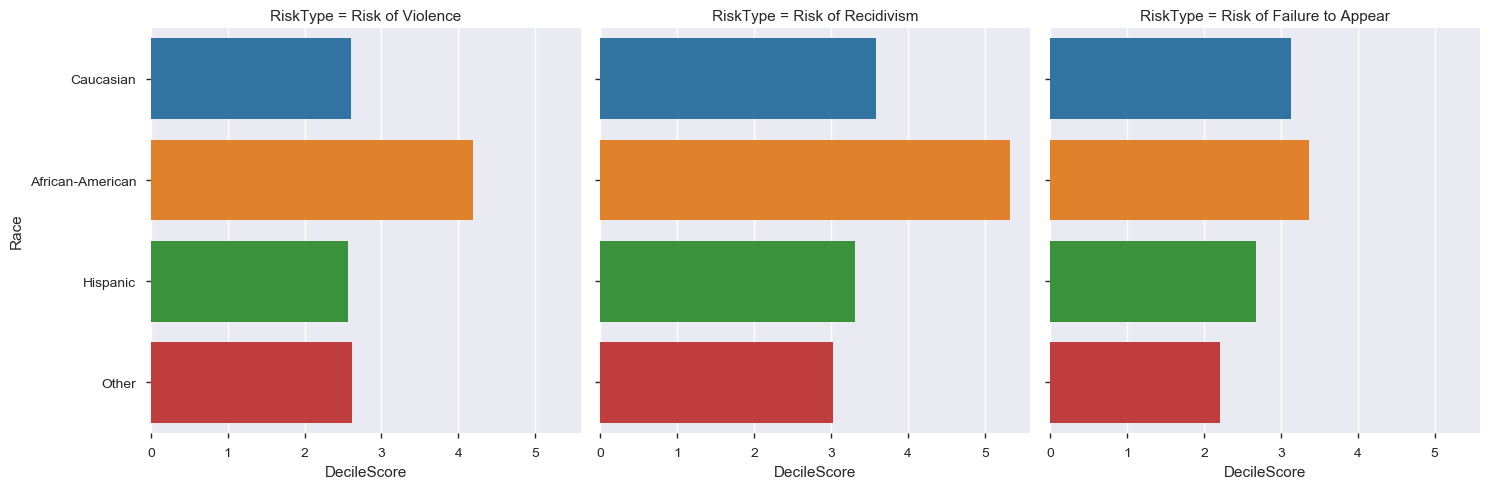

In [245]:
ax = sns.catplot(x='DecileScore',y='Race', col='RiskType', data=df, kind='bar', ci=False, orient='h')

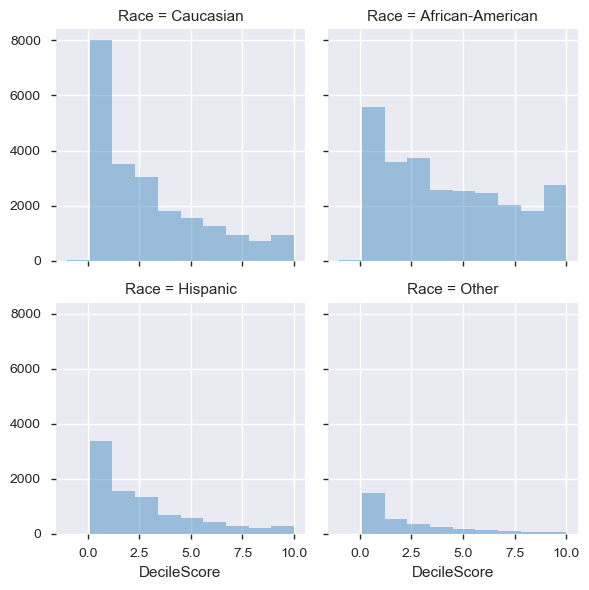

In [246]:
#distribution of decile scores across all races
#can see that african americans have the most evenly distributed decile scores
g = sns.FacetGrid(df, col='Race', col_wrap=2)
g = g.map(sns.distplot, 'DecileScore', kde=False, bins=10)

# Hypothesis Test 1

Question: Do African-Americans receive higher scores for recidivism than caucasians?

In [247]:
african_american = df[df.Race == 'African-American']
caucasian = df[df.Race == 'Caucasian']
african_american_scores = african_american['DecileScore']
caucasian_scores = caucasian['DecileScore']

In [248]:
african_american_scores.describe()

count    27069.000000
mean         4.291773
std          2.767021
min         -1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         10.000000
Name: DecileScore, dtype: float64

In [249]:
caucasian_scores.describe()

count    21783.000000
mean         3.108250
std          2.401878
min         -1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         10.000000
Name: DecileScore, dtype: float64

In [250]:
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats

In [251]:
tstat, pvalue, ddof = ttest_ind(
                                african_american_scores,
                                caucasian_scores,
                                alternative="larger",
                                usevar="pooled"
)

In [252]:
print(pvalue)

0.0


P-value of 0, so we can reject the null hypothesis and accept the statistically proven hypothesis that African Americans receive higher scores for recidivism than Caucasians

# Recommended Supervision Level

In [253]:
#race vs recommended supervision level
df.groupby('Race')['RecSupervisionLevel'].mean()

Race
African-American    1.943145
Caucasian           1.406418
Hispanic            1.334935
Other               1.314866
Name: RecSupervisionLevel, dtype: float64

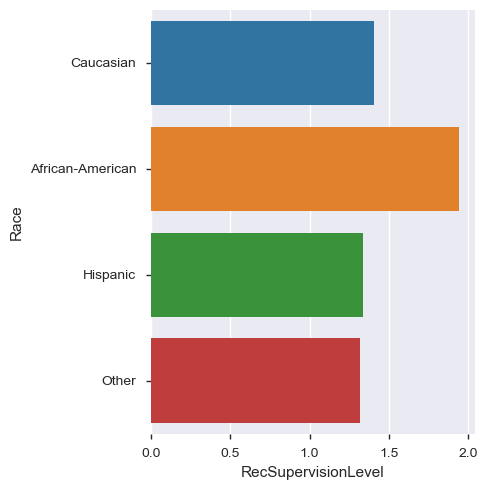

In [254]:
ax = sns.catplot(x='RecSupervisionLevel',y='Race', data=df, kind='bar', ci=False, orient='h')

# Hypothesis Test 2

Question: Do African-Americans receive higher recommended supervision levels than caucasians?

In [255]:
african_american = df[df.Race == 'African-American']
caucasian = df[df.Race == 'Caucasian']
african_american_lvl = african_american['RecSupervisionLevel']
caucasian_lvl = caucasian['RecSupervisionLevel']

In [256]:
african_american_lvl.describe()

count    27069.000000
mean         1.943145
std          1.054442
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: RecSupervisionLevel, dtype: float64

In [257]:
caucasian_lvl.describe()

count    21783.000000
mean         1.406418
std          0.773997
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: RecSupervisionLevel, dtype: float64

In [258]:
tstat, pvalue, ddof = ttest_ind(
                                african_american_lvl,
                                caucasian_lvl,
                                alternative="larger",
                                usevar="pooled"
)

In [259]:
print(pvalue)

0.0


P-value of 0, so we can reject the null hypothesis and accept the statistically proven hypothesis that African Americans receive higher recommended supervision levels than Caucasians

### Positive Correlation between RawScore and Scale_ID

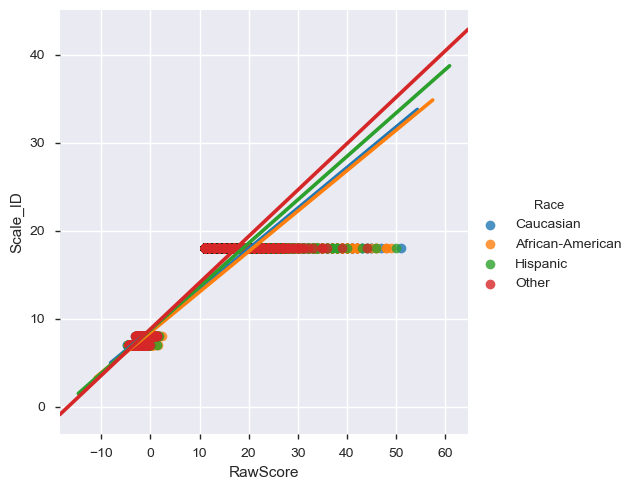

In [260]:
sns.lmplot(x='RawScore',y='Scale_ID',data=df, hue="Race", ci=False)

# Using two year data

In [261]:
recid = pd.read_csv("compas-scores-two-years.csv")

In [262]:
pd.set_option('max_columns', 53)

In [263]:
recid.head()

id                name   first         last compas_screening_date   sex  \
0   1    miguel hernandez  miguel    hernandez            2013-08-14  Male   
1   3         kevon dixon   kevon        dixon            2013-01-27  Male   
2   4            ed philo      ed        philo            2013-04-14  Male   
3   5         marcu brown   marcu        brown            2013-01-13  Male   
4   6  bouthy pierrelouis  bouthy  pierrelouis            2013-03-26  Male   

          dob  age          age_cat              race  juv_fel_count  \
0  1947-04-18   69  Greater than 45             Other              0   
1  1982-01-22   34          25 - 45  African-American              0   
2  1991-05-14   24     Less than 25  African-American              0   
3  1993-01-21   23     Less than 25  African-American              0   
4  1973-01-22   43          25 - 45             Other              0   

   decile_score  juv_misd_count  juv_other_count  priors_count  \
0             1               0                0             0   
1             3               0                0             0   
2             4               0                1             4   
3             8               1                0             1   
4             1               0                0             2   

   days_b_screening_arrest            c_jail_in           c_jail_out  \
0                     -1.0  2013-08-13 06:03:42  2013-08-14 05:41:20   
1                     -1.0  2013-01-26 03:45:27  2013-02-05 05:36:53   
2                     -1.0  2013-04-13 04:58:34  2013-04-14 07:02:04   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   

   c_case_number c_offense_date c_arrest_date  c_days_from_compas  \
0  13011352CF10A     2013-08-13           NaN                 1.0   
1  13001275CF10A     2013-01-26           NaN                 1.0   
2  13005330CF10A     2013-04-13           NaN                 1.0   
3  13000570CF10A     2013-01-12           NaN                 1.0   
4  12014130CF10A            NaN    2013-01-09                76.0   

  c_charge_degree                   c_charge_desc  is_recid  r_case_number  \
0               F    Aggravated Assault w/Firearm         0            NaN   
1               F  Felony Battery w/Prior Convict         1  13009779CF10A   
2               F           Possession of Cocaine         1  13011511MM10A   
3               F          Possession of Cannabis         0            NaN   
4               F           arrest case no charge         0            NaN   

  r_charge_degree  r_days_from_arrest r_offense_date  \
0             NaN                 NaN            NaN   
1            (F3)                 NaN     2013-07-05   
2            (M1)                 0.0     2013-06-16   
3             NaN                 NaN            NaN   
4             NaN                 NaN            NaN   

                 r_charge_desc   r_jail_in  r_jail_out  violent_recid  \
0                          NaN         NaN         NaN            NaN   
1  Felony Battery (Dom Strang)         NaN         NaN            NaN   
2  Driving Under The Influence  2013-06-16  2013-06-16            NaN   
3                          NaN         NaN         NaN            NaN   
4                          NaN         NaN         NaN            NaN   

   is_violent_recid vr_case_number vr_charge_degree vr_offense_date  \
0                 0            NaN              NaN             NaN   
1                 1  13009779CF10A             (F3)      2013-07-05   
2                 0            NaN              NaN             NaN   
3                 0            NaN              NaN             NaN   
4                 0            NaN              NaN             NaN   

                vr_charge_desc  type_of_assessment  decile_score.1 score_text  \
0                          NaN  Risk of Recidivism               1        Low   
1  Felony Battery (Dom

In [264]:
recid.isnull().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [265]:
drop_columns = ['compas_screening_date', 'juv_fel_count',
                'juv_misd_count','c_case_number','vr_charge_degree',
                'vr_offense_date','vr_charge_desc','c_arrest_date',
                'r_case_number', 'vr_case_number','start','age_cat',
                'juv_other_count','days_b_screening_arrest','c_days_from_compas']
recid = recid.drop(drop_columns,axis=1)

In [266]:
recid.shape

(7214, 38)

In [267]:
recid.drop(['violent_recid'],axis=1)

id                 name      first         last     sex         dob  \
0         1     miguel hernandez     miguel    hernandez    Male  1947-04-18   
1         3          kevon dixon      kevon        dixon    Male  1982-01-22   
2         4             ed philo         ed        philo    Male  1991-05-14   
3         5          marcu brown      marcu        brown    Male  1993-01-21   
4         6   bouthy pierrelouis     bouthy  pierrelouis    Male  1973-01-22   
...     ...                  ...        ...          ...     ...         ...   
7209  10996        steven butler     steven       butler    Male  1992-07-17   
7210  10997      malcolm simmons    malcolm      simmons    Male  1993-03-25   
7211  10999      winston gregory    winston      gregory    Male  1958-10-01   
7212  11000          farrah jean     farrah         jean  Female  1982-11-17   
7213  11001  florencia sanmartin  florencia    sanmartin  Female  1992-12-18   

      age              race  decile_score  priors_count            c_jail_in  \
0      69             Other             1             0  2013-08-13 06:03:42   
1      34  African-American             3             0  2013-01-26 03:45:27   
2      24  African-American             4             4  2013-04-13 04:58:34   
3      23  African-American             8             1                  NaN   
4      43             Other             1             2                  NaN   
...   ...               ...           ...           ...                  ...   
7209   23  African-American             7             0  2013-11-22 05:18:27   
7210   23  African-American             3             0  2014-01-31 07:13:54   
7211   57             Other             1             0  2014-01-13 05:48:01   
7212   33  African-American             2             3  2014-03-08 08:06:02   
7213   23          Hispanic             4             2  2014-06-28 12:16:41   

               c_jail_out c_offense_date c_charge_degree  \
0     2013-08-14 05:41:20     2013-08-13               F   
1     2013-02-05 05:36:53     2013-01-26               F   
2     2013-04-14 07:02:04     2013-04-13               F   
3                     NaN     2013-01-12               F   
4                     NaN            NaN               F   
...                   ...            ...             ...   
7209  2013-11-24 02:59:20     2013-11-22               F   
7210  2014-02-02 04:03:52     2014-01-31               F   
7211  2014-01-14 07:49:46     2014-01-13               F   
7212  2014-03-09 12:18:04     2014-03-08               M   
7213  2014-06-30 11:19:23     2014-06-28               F   

                       c_charge_desc  is_recid r_charge_degree  \
0       Aggravated Assault w/Firearm         0             NaN   
1     Felony Battery w/Prior Convict         1            (F3)   
2              Possession of Cocaine         1            (M1)   
3             Possession of Cannabis         0             NaN   
4              arrest case no charge         0             NaN   
...                              ...       ...             ...   
7209                Deliver Cannabis         0             NaN   
7210   Leaving the Scene of Accident         0             NaN   
7211   Aggravated Battery / Pregnant         0             NaN   
7212   Battery on Law Enforc Officer         0             NaN   
7213          Possession of Ethylone         1            (M2)   

      r_days_from_arrest r_offense_date                r_charge_desc  \
0                    NaN            NaN                          NaN   
1                    NaN     2013-07-05  Felony Battery (Dom Strang)   
2                    0.0     2013-06-16  Driving Under The Influence   
3                    NaN            NaN                          NaN   
4                    NaN            NaN                          NaN   
...                  ...            ...                          ...   
7209                 NaN            NaN                          NaN 

In [268]:
recid.dtypes

id                        int64
name                     object
first                    object
last                     object
sex                      object
dob                      object
age                       int64
race                     object
decile_score              int64
priors_count              int64
c_jail_in                object
c_jail_out               object
c_offense_date           object
c_charge_degree          object
c_charge_desc            object
is_recid                  int64
r_charge_degree          object
r_days_from_arrest      float64
r_offense_date           object
r_charge_desc            object
r_jail_in                object
r_jail_out               object
violent_recid           float64
is_violent_recid          int64
type_of_assessment       object
decile_score.1            int64
score_text               object
screening_date           object
v_type_of_assessment     object
v_decile_score            int64
v_score_text             object
v_screen

In [269]:
recid.dob = pd.to_datetime(recid['dob'])
recid.c_offense_date = pd.to_datetime(recid['c_offense_date'])

In [270]:
recid.dtypes

id                               int64
name                            object
first                           object
last                            object
sex                             object
dob                     datetime64[ns]
age                              int64
race                            object
decile_score                     int64
priors_count                     int64
c_jail_in                       object
c_jail_out                      object
c_offense_date          datetime64[ns]
c_charge_degree                 object
c_charge_desc                   object
is_recid                         int64
r_charge_degree                 object
r_days_from_arrest             float64
r_offense_date                  object
r_charge_desc                   object
r_jail_in                       object
r_jail_out                      object
violent_recid                  float64
is_violent_recid                 int64
type_of_assessment              object
decile_score.1           

In [271]:
recid.shape

(7214, 38)

In [272]:
recid.to_csv('compas-scores-two-years-clean')


### Calculate Average Decile Score

In [273]:
recid['Ave_score'] =(recid['v_decile_score']+recid['decile_score']+recid['decile_score.1'])/3

In [274]:
recid = recid.drop_duplicates(keep='first')

In [275]:
recid.shape

(7214, 39)

In [276]:
recid.head()

id                name   first         last   sex        dob  age  \
0   1    miguel hernandez  miguel    hernandez  Male 1947-04-18   69   
1   3         kevon dixon   kevon        dixon  Male 1982-01-22   34   
2   4            ed philo      ed        philo  Male 1991-05-14   24   
3   5         marcu brown   marcu        brown  Male 1993-01-21   23   
4   6  bouthy pierrelouis  bouthy  pierrelouis  Male 1973-01-22   43   

               race  decile_score  priors_count            c_jail_in  \
0             Other             1             0  2013-08-13 06:03:42   
1  African-American             3             0  2013-01-26 03:45:27   
2  African-American             4             4  2013-04-13 04:58:34   
3  African-American             8             1                  NaN   
4             Other             1             2                  NaN   

            c_jail_out c_offense_date c_charge_degree  \
0  2013-08-14 05:41:20     2013-08-13               F   
1  2013-02-05 05:36:53     2013-01-26               F   
2  2013-04-14 07:02:04     2013-04-13               F   
3                  NaN     2013-01-12               F   
4                  NaN            NaT               F   

                    c_charge_desc  is_recid r_charge_degree  \
0    Aggravated Assault w/Firearm         0             NaN   
1  Felony Battery w/Prior Convict         1            (F3)   
2           Possession of Cocaine         1            (M1)   
3          Possession of Cannabis         0             NaN   
4           arrest case no charge         0             NaN   

   r_days_from_arrest r_offense_date                r_charge_desc   r_jail_in  \
0                 NaN            NaN                          NaN         NaN   
1                 NaN     2013-07-05  Felony Battery (Dom Strang)         NaN   
2                 0.0     2013-06-16  Driving Under The Influence  2013-06-16   
3                 NaN            NaN                          NaN         NaN   
4                 NaN            NaN                          NaN         NaN   

   r_jail_out  violent_recid  is_violent_recid  type_of_assessment  \
0         NaN            NaN                 0  Risk of Recidivism   
1         NaN            NaN                 1  Risk of Recidivism   
2  2013-06-16            NaN                 0  Risk of Recidivism   
3         NaN            NaN                 0  Risk of Recidivism   
4         NaN            NaN                 0  Risk of Recidivism   

   decile_score.1 score_text screening_date v_type_of_assessment  \
0               1        Low     2013-08-14     Risk of Violence   
1               3        Low     2013-01-27     Risk of Violence   
2               4        Low     2013-04-14     Risk of Violence   
3               8       High     2013-01-13     Risk of Violence   
4               1        Low     2013-03-26     Risk of Violence   

   v_decile_score v_score_text v_screening_date  in_custody out_custody  \
0               1          Low       2013-08-14  2014-07-07  2014-07-14   
1               1          Low       2013-01-27  2013-01-26  2013-02-05   
2               3          Low       2013-04-14  2013-06-16  2013-06-16   
3               6       Medium       2013-01-13         NaN         NaN   
4               1          Low       2013-03-26         NaN         NaN   

   priors_count.1   end  event  two_year_recid  Ave_score  
0               0   327      0               0   1.000000  
1               0   159      1               1   2.333333  
2               4    63      0               1   3.666667  
3               1  1174      0               0   7.333333  
4               2  1102      0               0   1.000000

In [277]:
recid.groupby('race')[['two_year_recid']].mean()

two_year_recid
race                            
African-American        0.514340
Asian                   0.281250
Caucasian               0.393643
Hispanic                0.364207
Native American         0.555556
Other                   0.352785